In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Machine-Learning-Projects/House Price/Tehran House's price.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [5]:
cdf=[]

for i in range (len(df)):
    if ',' in df.Area.iloc[i]:
        cdf.append(i)

In [6]:
df = df.drop(cdf)
df.Area = df.Area.astype('int')
list_Address = df.Address.unique()
le = LabelEncoder()
le.fit(list_Address)
df.Address = le.transform(df.Address)
le.get_params()

{}

In [7]:
for i in [df.Parking, df.Warehouse, df.Elevator]:
    for j in range (len(df)):
        if i.iloc[j] == True:
            i.iloc[j] = 1
        elif i.iloc[j] == False:
            i.iloc[j] = 0
        else:
            print (i, j)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17576\308651658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.iloc[j] = 1


In [8]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,163,3.500000e+09,116666.67
3475,83,2,1,1,1,105,6.800000e+09,226666.67
3476,75,2,0,0,0,115,3.650000e+08,12166.67
3477,105,2,1,1,1,39,5.600000e+09,186666.67


In [9]:
df = df.astype('int')

In [10]:
df.isna().any()

Area          False
Room          False
Parking       False
Warehouse     False
Elevator      False
Address       False
Price         False
Price(USD)    False
dtype: bool

In [11]:
df.Address.isna() == True

0       False
1       False
2       False
3       False
4       False
        ...  
3474    False
3475    False
3476    False
3477    False
3478    False
Name: Address, Length: 3473, dtype: bool

In [12]:
df.dropna(inplace = True)

In [13]:
df[df['Address'].isna()]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)


In [14]:
x = df.iloc[:,:-2]

In [15]:
y = df.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
def base_model (inputs):
    x = Dense (16,activation='relu')(inputs)
    x = Dense (4, activation='relu')(x)
    return x

In [18]:
def final_model (inputs):
    x = base_model (inputs)
    price = Dense (1)(x)
    my_model = Model(inputs, price)
    return my_model

In [19]:
inputs = Input (shape=(6))
model = final_model (inputs)

In [36]:
model.compile (loss='mse')

In [ ]:
history = model.fit (X_train, y_train, epochs=5000, validation_data=(X_test, y_test))

Epoch 1/5000
87/87 [==============================] - 1s 2ms/step - loss: 37006983168.0000 - val_loss: 34479239168.0000
Epoch 2/5000
87/87 [==============================] - 0s 1ms/step - loss: 37003472896.0000 - val_loss: 34466447360.0000
Epoch 3/5000
87/87 [==============================] - 0s 1ms/step - loss: 37012418560.0000 - val_loss: 34392244224.0000
Epoch 4/5000
87/87 [==============================] - 0s 1ms/step - loss: 37003911168.0000 - val_loss: 34462932992.0000
Epoch 5/5000
87/87 [==============================] - 0s 2ms/step - loss: 36998213632.0000 - val_loss: 34433138688.0000
Epoch 6/5000
87/87 [==============================] - 0s 2ms/step - loss: 37005336576.0000 - val_loss: 34391523328.0000
Epoch 7/5000
87/87 [==============================] - 0s 1ms/step - loss: 37004005376.0000 - val_loss: 34412474368.0000
Epoch 8/5000
87/87 [==============================] - 0s 1ms/step - loss: 37001076736.0000 - val_loss: 34432503808.0000
Epoch 9/5000
87/87 [====================

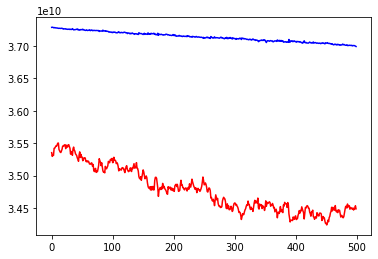

In [35]:
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['loss'], 'b')

In [24]:
history.history.keys()

dict_keys(['loss', 'val_loss'])